<a href="https://colab.research.google.com/github/MarahRamadan/TensorFlow/blob/master/TensorFlow_Exercises_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.




In [0]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Beyond Hello World, A Computer Vision Example


what about a scenario where writing rules like that is much more difficult -- for example a computer vision problem? Let's take a look at a scenario where we can recognize different items of clothing, trained from a dataset containing 10 different types.

## Start Coding

Let's start with our import of TensorFlow

In [0]:
import tensorflow as tf
print(tf.__version__)

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

In [0]:
mnist = tf.keras.datasets.fashion_mnist

Calling load_data on this object will give you two sets of two lists, these will be the training and testing values for the graphics that contain the clothing items and their labels.


In [0]:
(train_data, train_label),(test_data, test_label) = mnist.load_data()

What does these values look like? Let's print a training image, and a training label to see...Experiment with different indices in the array. For example, also take a look at index 42...that's a a different boot than the one at index 0


In [0]:
import numpy as np
#print the full NumPy array, without truncation? .. set_printoptions
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(train_data[42])
print(train_label[42])
print(train_data[42])

You'll notice that all of the values in the number are between 0 and 255. If we are training a neural network, for various reasons it's easier if we treat all values as between 0 and 1, a process called '**normalizing**'...and fortunately in Python it's easy to normalize a list like this without looping. You do it like this:

In [0]:
#treat all values as between 0 and 1, a process called 'normalizing'
train_data = train_data / 255.0
test_data = test_data/ 255.0

Now you might be wondering why there are 2 sets...training and testing -- remember we spoke about this in the intro? The idea is to have 1 set of data for training, and then another set of data...that the model hasn't yet seen...to see how good it would be at classifying values. After all, when you're done, you're going to want to try it out with data that it hadn't previously seen!

Let's now design the model.

In [0]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                  tf.keras.layers.Dense (128, tf.nn.relu),
                                  tf.keras.layers.Dense(10, tf.nn.softmax)])

**Sequential**: That defines a SEQUENCE of layers in the neural network

**Flatten**: Flatten just takes that square and turns it into a 1 dimensional set.

**Dense**: Adds a layer of neurons

Each layer of neurons need an **activation function** to tell them what to do. There's lots of options, but just use these for now. 

**Relu** effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

**Softmax** takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!


The next thing to do, now the model is defined, is to actually build it. You do this by compiling it with an optimizer and loss function as before -- and then you train it by calling **model.fit ** asking it to fit your training data to your training labels -- i.e. have it figure out the relationship between the training data and its actual labels, so in future if you have data that looks like the training data, then it can make a prediction for what that data would look like. 

Let's now build the model.

In [0]:
model.compile(optimizer= tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_data, train_label, epochs=8)

Once it's done training -- you should see an accuracy value at the end of the final epoch. It might look something like 0.9038. This tells you that your neural network is about 91% accurate in classifying the training data. I.E., it figured out a pattern match between the image and the labels that worked 91% of the time. Not great, but not bad considering it was only trained for 8 epochs and done quite quickly.

But how would it work with unseen data? That's why we have the test images. We can call model.evaluate, and pass in the two sets, and it will report back the loss for each. Let's give it a try:

Let's evaluate the model.

In [0]:
model.evaluate(test_data,test_label)

Stop training in a certain point, using callbacks , Training loop does support callbacks, in every epoch.

In [0]:
#Define a separate **class**
class myCallback (tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, log={}):
    if (log.get('accuracy')>0.90):
      print("\nReached the accuracy so cancelling training!")
      self.model.stop_training =True

In [0]:
#create instance from that class
callback = myCallback()
model.fit(train_data,train_label, epochs=5, callbacks=[callback])

#Improving Computer Vision Accuracy using Convolutions

Previously we saw how to do fashion recognition using a Deep Neural Network (DNN) containing three layers -- the input layer (in the shape of the data), the output layer (in the shape of the desired output) and a hidden layer. 


Going better with convolutions.
In short, you take an array (usually 3x3 or 5x5) and pass it over the image. By changing the underlying pixels based on the formula within that matrix, you can do things like edge detection.
This is perfect for computer vision, because often it's features that can get highlighted like this that distinguish one item for another, and the amount of information needed is then much less...because you'll just train on the highlighted features.

That's the concept of Convolutional Neural Networks. Add some layers to do convolution before you have the dense layers, and then the information going to the dense layers is more focussed, and possibly more accurate.

Run the below code -- this is the same neural network as earlier, but this time with Convolutional layers added first. It will take longer, but look at the impact on the accuracy:

In [0]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(train_data,train_label),(test_data, test_label) = mnist.load_data()

You'll notice that there's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution **expects a single tensor containing everything**, so instead of 60,000 28x28x1 items in a list, we have **a single 4D list that is 60,000x28x28x1**, and the same for the test images. The test  data is 10,000. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

In [0]:
train_data = train_data.reshape(60000, 28, 28, 1)
train_data = train_data/ 255.0

test_data = test_data.reshape(10000, 28, 28, 1)
test_data= test_data/ 255.0

We're going to add a Convolution at the top. The parameters are:


1.  The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
2.   The size of the Convolution, in this case a 3x3 grid
3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
4. **In the first layer, the shape of the input data.**

MaxPooling layer which is then designed to **compress the image, while maintaining the content of the features that were highlighted by the convlution.** 
MaxPooling (2,2), it creates a **2x2 array of pixels**, and picks the biggest one, thus turning 4 pixels into 1. It repeats this across the image, and in so doing halves the number of horizontal, and halves the number of vertical pixels, effectively **reducing the image by 25%.**

In [0]:
model2= tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3) , activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation= 'relu'),
                                    tf.keras.layers.Dense(10, activation= 'softmax')])

In [0]:
model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model2.summary()

In [0]:
model2.fit(train_data, train_label, epochs=5)

# Visualizing the Convolutions and Pooling

This code will show us the convolutions graphically. The print (test_labels[:100]) shows us the first 100 labels in the test set, and you can see that the ones at index 0, index 23 and index 28 are all the same value (9). They're all shoes. 


In [0]:
print(test_label[:100])


**Let's take a look at the result of running the convolution on each, and you'll begin to see common features between them emerge.**

Now, when the DNN is training on that data, it's working with a lot less, and it's perhaps finding a commonality between shoes based on this convolution/pooling combination.

In [0]:
FIRST_IMAGE = 0
SECOND_IMAGE = 23
THIRD_IMAGE= 28

CONVOLUTION_NUMBER = 1

from tensorflow.keras import models

#create a list of the layer's output
layer_outputs= [layer.output for layer in model2.layers]
#treat each item in the layer as an individual activation model
activation_model = tf.keras.models.Model(inputs = model2.input, outputs = layer_outputs)


By looping through the layers, I can display the journey of the image through the first convolution and then the first pooling and then the second convolution and then the second pooling.

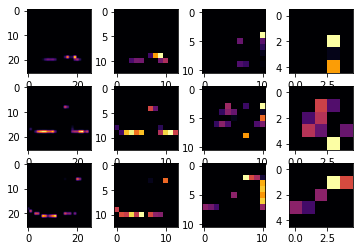

In [0]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
for x in range(0,4):
  f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28,1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28,1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

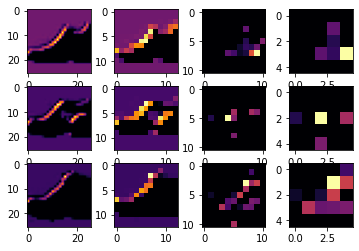

In [0]:
CONVOLUTION_NUMBER = 2
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
for x in range(0,4):
  f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28,1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28,1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

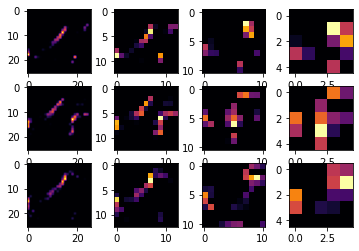

In [0]:
CONVOLUTION_NUMBER = 63
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
for x in range(0,4):
  f1 = activation_model.predict(test_data[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)

  f2 = activation_model.predict(test_data[SECOND_IMAGE].reshape(1, 28, 28,1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)

  f3 = activation_model.predict(test_data[THIRD_IMAGE].reshape(1, 28, 28,1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)